In [1]:
%matplotlib inline
%load_ext rpy2.ipython

In [2]:
%%R
workDir = '/home/chantal/Chazy/Bulk/515_806/data'
figDir = '/home/chantal/Chazy/Bulk/515_806/data/figs/'

physeqDir = '/home/chantal/Chazy/data/phyloseq/'
physeqBulk = 'bulk-core-rare'
#physeqBulk = 'bulk-core' 

#l2fcResFile = file.path(workDir, 'l2fc_sparse-maxRejH_BULK_0.25_.txt')
## NOTEBOOK RUN WITH 0.25 SPARSITY FILTERED DATASET...

nprocs = 20

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [3]:
%%R
library(ggplot2)
library(phyloseq)
library(gridExtra)
library(data.table)
library(vegan)
library(plyr);library(dplyr)
library(tidyr)
library(picante)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Use suppressPackageStartupMessages() to eliminate package startup
messages.

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: data.table 1.9.6  For help type ?data.table or https://github.com/Rdatatable/data.table/wiki

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The fastest way to learn (by data.table authors): https://www.datacamp.com/courses/data-analysis-the-data-table-way

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: permute

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106:

In [4]:
%%R

##Importing and pruning physeq object

F = file.path(physeqDir, physeqBulk)
physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data
physeq.Bulk = prune_samples((physeq.Bulk.m$Land_Management != "PAS"),
                           physeq.Bulk)


physeq.Bulk.m = physeq.Bulk %>% sample_data

physeq.Bulk

physeq.sparse = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.sparse


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3964 taxa and 175 samples ]
sample_data() Sample Data:       [ 175 samples by 25 sample variables ]
tax_table()   Taxonomy Table:    [ 3964 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 3964 tips and 3963 internal nodes ]


In [5]:
%%R
#Creating dataframe from physeq object
mdf = psmelt(physeq.sparse)

## Calculating NRI (SES - to get NRI, multiply z values by -1)

In [6]:
%%R
df.l2fc.Till = read.table('data/l2fc_Till.txt', sep = '\t', header = TRUE)
head(df.l2fc.Till)

  sparsity_threshold       OTU log2FoldChange     lfcSE         padj    Rank1
1               0.25  OTU.1739      0.4012126 0.4523957 4.684148e-01 Bacteria
2               0.25  OTU.1813     -1.4802581 0.4326507 1.826795e-03 Bacteria
3               0.25   OTU.778     -0.5498601 0.1379296 2.483877e-04 Bacteria
4               0.25  OTU.2180     -0.3066501 0.2858391 3.755368e-01 Bacteria
5               0.25 OTU.12365     -0.1443963 0.2567288 6.562578e-01 Bacteria
6               0.25  OTU.2343      1.3595096 0.3116793 5.598476e-05 Bacteria
             Rank2          Rank3                  Rank4 Rank5 Rank6 Rank7
1 __Planctomycetes        __OM190 __uncultured_bacterium  <NA>  <NA>  <NA>
2 __Planctomycetes        __OM190 __uncultured_bacterium  <NA>  <NA>  <NA>
3 __Planctomycetes __Pla4_lineage __uncultured_bacterium  <NA>  <NA>  <NA>
4 __Planctomycetes __Pla4_lineage __uncultured_bacterium  <NA>  <NA>  <NA>
5 __Planctomycetes __Pla4_lineage __uncultured_bacterium  <NA>  <NA>  <NA>
6 __

In [7]:
%%R
N.l2fc = filter(df.l2fc.Till, padj2 <=0.10, Till == 'N')
P.l2fc = filter(df.l2fc.Till, padj2 <=0.10, Till == 'T')

In [9]:
%%R
N = filter(mdf, OTU %in% N.l2fc$OTU)
P = filter(mdf, OTU %in% P.l2fc$OTU)

In [10]:
%%R
print(length(unique(N$OTU)))
print(length(unique(P$OTU)))


[1] 860
[1] 1152


In [94]:
%%R
head(N)

     OTU         Sample Abundance    Full.sample Fraction PrimerF PrimerR
1 OTU.12        N.NTH.4       717        N.NTH.4       NA    515f    806r
2 OTU.12        O.NTH.3       639        O.NTH.3       NA    515f    806r
3 OTU.12        N.NTH.2       634        N.NTH.2       NA    515f    806r
4 OTU.12 Oct.NTH.3.2015       606 Oct.NTH.3.2015       NA    515f    806r
5 OTU.12        N.NTH.1       556        N.NTH.1       NA    515f    806r
6 OTU.12   June15.NTH.3       537   June15.NTH.3       NA    515f    806r
  Barcode Rev.index Fwd.index Treatment Day Replicate Pool Land_Management
1     177  gtctatga  ctactata      <NA>  NA         4    5             NTH
2     158  cgagcgac  tcgacgag      <NA>  NA         3    5             NTH
3     175  gtctgcta  gatcgtgt      <NA>  NA         2    5             NTH
4      54  tagtctcc  cgtgagtg      <NA>  NA         3    8             NTH
5     174  gtctgcta  tcgacgag      <NA>  NA         1    5             NTH
6      89  tatagcga  atcgtacg   

In [11]:
%%R
N$Treat = paste(N$Land_Management, N$Replicate, sep = '.')
N$Treat[N$Treat == 'NTR.NA'] = 'NTR.3'
N$Replicate[is.na(N$Replicate)] = 3

N2 = N %>% group_by(Replicate, OTU) %>% summarise(totalab = sum(Abundance))
N2$Comm = 'N'
head(N2)

Source: local data frame [6 x 4]
Groups: Replicate [1]

  Replicate       OTU totalab  Comm
      (dbl)     (chr)   (dbl) (chr)
1         1  OTU.1006     183     N
2         1 OTU.10080      32     N
3         1  OTU.1015     260     N
4         1  OTU.1019      11     N
5         1   OTU.102    1232     N
6         1 OTU.10228      70     N


In [12]:
%%R
P$Treat = paste(P$Land_Management, P$Replicate, sep = '.')
P$Treat[P$Treat == 'NTR.NA'] = 'NTR.3'
P$Replicate[is.na(P$Replicate)] = 3

P2 = P %>% group_by(Replicate, OTU) %>% summarise(totalab = sum(Abundance))
P2$Comm = 'P'
head(P2)

Source: local data frame [6 x 4]
Groups: Replicate [1]

  Replicate       OTU totalab  Comm
      (dbl)     (chr)   (dbl) (chr)
1         1     OTU.1    5259     P
2         1  OTU.1000     139     P
3         1  OTU.1001      95     P
4         1  OTU.1003      72     P
5         1  OTU.1005      88     P
6         1 OTU.10051      35     P


In [13]:
%%R
OTUs.N = N2 %>% select(OTU, Replicate, totalab) %>% spread(OTU, totalab)

OTUs.P = P2 %>% select(OTU, Replicate, totalab) %>% spread(OTU, totalab)

In [158]:
%%R
#OTUs.N = N %>% select(OTU, Treat, Abundance) %>% spread(OTU, Abundance)

#OTUs.P = P %>% select(OTU, Treat, Abundance) %>% spread(OTU, Abundance)

NULL


In [17]:
%%R
ncol(OTUs.N)

[1] 861


In [18]:
%%R
#Setting OTUs as rownames
rownames(OTUs.N) = OTUs.N$Replicate
OTUs.N$Replicate = NULL

rownames(OTUs.P) = OTUs.P$Replicate
OTUs.P$Replicate = NULL

In [19]:
%%R
#Normalizing OTU counts 
comm.N <- decostand(OTUs.N, method = "total")

comm.P <- decostand(OTUs.P, method = "total")

In [20]:
%%R 
#Importing phylogenetic tree
phy = read.tree('otusn_pick_sparse.tree')
#plot(phy, cex = 0.5)

In [21]:
%%R
tree = as.phylo(phy)

In [ ]:
%%R
# For NRI, create 2 comm files - one for NT and one for PT...but use whole tree for both
nri.N = ses.mpd(comm.N,cophenetic(tree),null.model="taxa.labels",runs=1000)


In [22]:
%%R
nri.N.global = ses.mpd(comm.N,cophenetic(tree),null.model="taxa.labels",runs=1000)


In [30]:
%%R
nri.N.global

  ntaxa   mpd.obs mpd.rand.mean mpd.rand.sd mpd.obs.rank mpd.obs.z   mpd.obs.p
1   860 0.6874753     0.7245987  0.00794693            1 -4.671421 0.000999001
2   860 0.6874753     0.7245987  0.00794693            1 -4.671421 0.000999001
3   860 0.6874753     0.7245987  0.00794693            1 -4.671421 0.000999001
4   860 0.6874753     0.7245987  0.00794693            1 -4.671421 0.000999001
  runs
1 1000
2 1000
3 1000
4 1000


In [31]:
%%R
write.csv(nri.N.global, 'data/nri_N_global.csv')

In [24]:
%%R
nri.P.global = ses.mpd(comm.P,cophenetic(tree),null.model="taxa.labels",runs=1000)


In [32]:
%%R
write.csv(nri.P.global, 'data/nri_P_global.csv')

In [25]:
%%R
nri.P.global

  ntaxa   mpd.obs mpd.rand.mean mpd.rand.sd mpd.obs.rank mpd.obs.z mpd.obs.p
1  1152 0.7382072     0.7243441 0.006597188          985  2.101370  0.984016
2  1152 0.7382072     0.7243441 0.006597188          985  2.101370  0.984016
3  1151 0.7381512     0.7243348 0.006608059          984  2.090838  0.983017
4  1152 0.7382072     0.7243441 0.006597188          985  2.101370  0.984016
  runs
1 1000
2 1000
3 1000
4 1000


In [ ]:
%%R 
write.csv(nri.N, file = 'data/NRI_N_all_sparse.csv')
nri.N = 0 

In [59]:
%%R
NRI_N = read.csv('data/NRI_N_all_sparse.csv')
NRI_N$padj = p.adjust(NRI_N$mpd.obs.p,"BH")
head(NRI_N)
summary(NRI_N)

             X           ntaxa          mpd.obs       mpd.rand.mean   
 April15.NTH.1:  1   Min.   :340.0   Min.   :0.7016   Min.   :0.7853  
 April15.NTH.2:  1   1st Qu.:445.5   1st Qu.:0.7246   1st Qu.:0.7858  
 April15.NTH.3:  1   Median :541.0   Median :0.7338   Median :0.7860  
 April15.NTH.4:  1   Mean   :538.1   Mean   :0.7325   Mean   :0.7860  
 April15.NTR.1:  1   3rd Qu.:635.0   3rd Qu.:0.7413   3rd Qu.:0.7861  
 April15.NTR.2:  1   Max.   :725.0   Max.   :0.7581   Max.   :0.7865  
 (Other)      :169                                                    
  mpd.rand.sd        mpd.obs.rank     mpd.obs.z        mpd.obs.p       
 Min.   :0.008853   Min.   :1.000   Min.   :-7.059   Min.   :0.000999  
 1st Qu.:0.009683   1st Qu.:1.000   1st Qu.:-5.311   1st Qu.:0.000999  
 Median :0.010783   Median :1.000   Median :-4.866   Median :0.000999  
 Mean   :0.010898   Mean   :1.006   Mean   :-4.873   Mean   :0.001005  
 3rd Qu.:0.011947   3rd Qu.:1.000   3rd Qu.:-4.403   3rd Qu.:0.000999  


In [ ]:
%%R
head(NRI_N)

In [65]:
%%R
NRI_N$treat = 'N'
head(NRI_N)

              X ntaxa   mpd.obs mpd.rand.mean mpd.rand.sd mpd.obs.rank
1 April15.NTH.1   608 0.7387883     0.7856502 0.009954818            1
2 April15.NTH.2   646 0.7337927     0.7860245 0.009611048            1
3 April15.NTH.3   613 0.7516063     0.7858399 0.009882329            1
4 April15.NTH.4   611 0.7340909     0.7859373 0.010016218            1
5 April15.NTR.1   637 0.7388075     0.7859978 0.009695662            1
6 April15.NTR.2   564 0.7432687     0.7862286 0.010579741            1
  mpd.obs.z   mpd.obs.p runs        padj treat
1 -4.707462 0.000999001 1000 0.001004742     N
2 -5.434556 0.000999001 1000 0.001004742     N
3 -3.464119 0.000999001 1000 0.001004742     N
4 -5.176245 0.000999001 1000 0.001004742     N
5 -4.867155 0.000999001 1000 0.001004742     N
6 -4.060588 0.000999001 1000 0.001004742     N


In [ ]:
%%R 
#it is a bicaudal test, so use p values of 0.025 and 0.975 to know if the observed value is lower or higher 
#than expected by chance
head(nri.N)


In [ ]:
%%R
nri.P = ses.mpd(comm.P,cophenetic(tree),null.model="taxa.labels", runs = 1000)


In [ ]:
%%R
write.csv(nri.P, file = 'data/NRI_P_all_sparse.csv')
nri.P = 0 

In [60]:
%%R
NRI_P = read.csv('data/NRI_P_all_sparse.csv')
NRI_P$padj = p.adjust(NRI_P$mpd.obs.p,"BH")
head(NRI_P)
summary(NRI_P)

             X           ntaxa          mpd.obs       mpd.rand.mean   
 April15.NTH.1:  1   Min.   :367.0   Min.   :0.7413   Min.   :0.7859  
 April15.NTH.2:  1   1st Qu.:547.0   1st Qu.:0.7624   1st Qu.:0.7863  
 April15.NTH.3:  1   Median :649.0   Median :0.7723   Median :0.7864  
 April15.NTH.4:  1   Mean   :677.1   Mean   :0.7705   Mean   :0.7865  
 April15.NTR.1:  1   3rd Qu.:818.5   3rd Qu.:0.7782   3rd Qu.:0.7866  
 April15.NTR.2:  1   Max.   :921.0   Max.   :0.7946   Max.   :0.7869  
 (Other)      :169                                                    
  mpd.rand.sd        mpd.obs.rank     mpd.obs.z         mpd.obs.p       
 Min.   :0.007637   Min.   :  1.0   Min.   :-4.2009   Min.   :0.000999  
 1st Qu.:0.008315   1st Qu.: 13.0   1st Qu.:-2.2871   1st Qu.:0.012987  
 Median :0.009550   Median : 56.0   Median :-1.6013   Median :0.055944  
 Mean   :0.009566   Mean   :129.5   Mean   :-1.5845   Mean   :0.129368  
 3rd Qu.:0.010669   3rd Qu.:172.0   3rd Qu.:-0.9204   3rd Qu.:0.171

In [63]:
%%R
NRI_P$treat = 'P'
head(NRI_P)

              X ntaxa   mpd.obs mpd.rand.mean mpd.rand.sd mpd.obs.rank
1 April15.NTH.1   606 0.7728830     0.7863105 0.009874466           82
2 April15.NTH.2   634 0.7828013     0.7862055 0.009626860          357
3 April15.NTH.3   566 0.7626927     0.7867511 0.010406363           10
4 April15.NTH.4   578 0.7639059     0.7864638 0.010299362           18
5 April15.NTR.1   556 0.7629339     0.7867575 0.010642463           15
6 April15.NTR.2   454 0.7546161     0.7866112 0.011984323            5
   mpd.obs.z   mpd.obs.p runs       padj treat
1 -1.3598113 0.081918082 1000 0.14860140     P
2 -0.3536107 0.356643357 1000 0.40266185     P
3 -2.3118899 0.009990010 1000 0.04472272     P
4 -2.1902235 0.017982018 1000 0.05721551     P
5 -2.2385457 0.014985015 1000 0.04947882     P
6 -2.6697427 0.004995005 1000 0.03362023     P


In [66]:
%%R
NRI_tot = rbind(NRI_N, NRI_P)
head(NRI_tot)

              X ntaxa   mpd.obs mpd.rand.mean mpd.rand.sd mpd.obs.rank
1 April15.NTH.1   608 0.7387883     0.7856502 0.009954818            1
2 April15.NTH.2   646 0.7337927     0.7860245 0.009611048            1
3 April15.NTH.3   613 0.7516063     0.7858399 0.009882329            1
4 April15.NTH.4   611 0.7340909     0.7859373 0.010016218            1
5 April15.NTR.1   637 0.7388075     0.7859978 0.009695662            1
6 April15.NTR.2   564 0.7432687     0.7862286 0.010579741            1
  mpd.obs.z   mpd.obs.p runs        padj treat
1 -4.707462 0.000999001 1000 0.001004742     N
2 -5.434556 0.000999001 1000 0.001004742     N
3 -3.464119 0.000999001 1000 0.001004742     N
4 -5.176245 0.000999001 1000 0.001004742     N
5 -4.867155 0.000999001 1000 0.001004742     N
6 -4.060588 0.000999001 1000 0.001004742     N


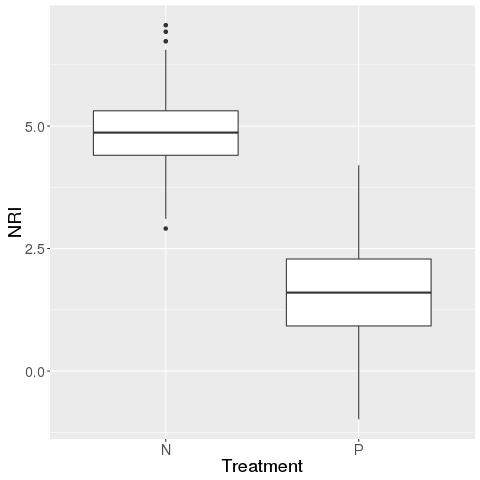

In [67]:
%%R
ggplot(data = NRI_tot, aes(x = treat, y = -mpd.obs.z)) +
geom_boxplot() + theme(text = element_text(size = 18)) + xlab('Treatment') + ylab('NRI')

In [68]:
%%R
t.test(NRI_tot$mpd.obs.z ~ NRI_tot$treat)


	Welch Two Sample t-test

data:  NRI_tot$mpd.obs.z by NRI_tot$treat
t = -36.159, df = 320.55, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.467076 -3.109261
sample estimates:
mean in group N mean in group P 
      -4.872683       -1.584515 



## Calculating NTI (SES, multiply z-values by -1 to get NTI)

In [ ]:
%%R
nti.N = ses.mntd(comm.N,cophenetic(tree),null.model="taxa.labels",runs=1000)


In [26]:
%%R
nti.N.global = ses.mntd(comm.N,cophenetic(tree),null.model="taxa.labels",runs=1000)


In [33]:
%%R
nti.N.global

  ntaxa   mntd.obs mntd.rand.mean mntd.rand.sd mntd.obs.rank mntd.obs.z
1   860 0.08108841     0.08916648  0.002235486             1  -3.613566
2   860 0.08108841     0.08916648  0.002235486             1  -3.613566
3   860 0.08108841     0.08916648  0.002235486             1  -3.613566
4   860 0.08108841     0.08916648  0.002235486             1  -3.613566
   mntd.obs.p runs
1 0.000999001 1000
2 0.000999001 1000
3 0.000999001 1000
4 0.000999001 1000


In [34]:
%%R
write.csv(nti.N.global, 'data/nti_N_global.csv')

In [ ]:
%%R
write.csv(nti.N, file = 'data/NTI_N_all_sparse.csv')
nti.N = 0 

In [62]:
%%R
NTI_N = read.csv('data/NTI_N_all_sparse.csv')
NTI_N$padj = p.adjust(NTI_N$mntd.obs.p,"BH")

summary(NTI_N)

             X           ntaxa          mntd.obs       mntd.rand.mean  
 April15.NTH.1:  1   Min.   :340.0   Min.   :0.09207   Min.   :0.1135  
 April15.NTH.2:  1   1st Qu.:445.5   1st Qu.:0.09771   1st Qu.:0.1200  
 April15.NTH.3:  1   Median :541.0   Median :0.10076   Median :0.1284  
 April15.NTH.4:  1   Mean   :538.1   Mean   :0.10146   Mean   :0.1300  
 April15.NTR.1:  1   3rd Qu.:635.0   3rd Qu.:0.10511   3rd Qu.:0.1390  
 April15.NTR.2:  1   Max.   :725.0   Max.   :0.11574   Max.   :0.1556  
 (Other)      :169                                                     
  mntd.rand.sd      mntd.obs.rank   mntd.obs.z       mntd.obs.p      
 Min.   :0.003521   Min.   :1     Min.   :-7.921   Min.   :0.000999  
 1st Qu.:0.004010   1st Qu.:1     1st Qu.:-6.549   1st Qu.:0.000999  
 Median :0.004651   Median :1     Median :-6.019   Median :0.000999  
 Mean   :0.004749   Mean   :1     Mean   :-5.939   Mean   :0.000999  
 3rd Qu.:0.005396   3rd Qu.:1     3rd Qu.:-5.356   3rd Qu.:0.000999  
 Max

In [ ]:
%%R
nti.P = ses.mntd(comm.P,cophenetic(tree),null.model="taxa.labels",runs=1000)


In [28]:
%%R
nti.P.global = ses.mntd(comm.P,cophenetic(tree),null.model="taxa.labels",runs=1000)


In [35]:
%%R
nti.P.global

  ntaxa   mntd.obs mntd.rand.mean mntd.rand.sd mntd.obs.rank mntd.obs.z
1  1152 0.07189280     0.07893255  0.001729941             1  -4.069359
2  1152 0.07189280     0.07893255  0.001729941             1  -4.069359
3  1151 0.07180751     0.07896423  0.001732572             1  -4.130694
4  1152 0.07189280     0.07893255  0.001729941             1  -4.069359
   mntd.obs.p runs
1 0.000999001 1000
2 0.000999001 1000
3 0.000999001 1000
4 0.000999001 1000


In [36]:
%%R
write.csv(nti.P.global, 'data/nti_P_global.csv')

In [ ]:
%%R
write.csv(nti.P, file = 'data/NTI_P_all_sparse.csv')
nti.P = 0 

In [61]:
%%R
NTI.P = read.csv('data/NTI_P_all_sparse.csv', header = TRUE)
NTI.P$padj = p.adjust(NTI.P$mntd.obs.p,"BH")

summary(NTI.P)

             X           ntaxa          mntd.obs       mntd.rand.mean  
 April15.NTH.1:  1   Min.   :367.0   Min.   :0.08790   Min.   :0.1028  
 April15.NTH.2:  1   1st Qu.:547.0   1st Qu.:0.09356   1st Qu.:0.1081  
 April15.NTH.3:  1   Median :649.0   Median :0.09986   Median :0.1192  
 April15.NTH.4:  1   Mean   :677.1   Mean   :0.10000   Mean   :0.1187  
 April15.NTR.1:  1   3rd Qu.:818.5   3rd Qu.:0.10565   3rd Qu.:0.1281  
 April15.NTR.2:  1   Max.   :921.0   Max.   :0.11819   Max.   :0.1509  
 (Other)      :169                                                     
  mntd.rand.sd      mntd.obs.rank     mntd.obs.z       mntd.obs.p      
 Min.   :0.002939   Min.   :1.000   Min.   :-6.688   Min.   :0.000999  
 1st Qu.:0.003268   1st Qu.:1.000   1st Qu.:-5.189   1st Qu.:0.000999  
 Median :0.004005   Median :1.000   Median :-4.652   Median :0.000999  
 Mean   :0.003973   Mean   :1.057   Mean   :-4.668   Mean   :0.001056  
 3rd Qu.:0.004619   3rd Qu.:1.000   3rd Qu.:-4.200   3rd Qu.:0.0

In [52]:
%%R
NTI_N$treat = 'N'
NTI.P$treat = 'P'

In [53]:
%%R
NTI_tot = rbind(NTI_N, NTI.P)
head(NTI_tot)

              X ntaxa   mntd.obs mntd.rand.mean mntd.rand.sd mntd.obs.rank
1 April15.NTH.1   608 0.10170426      0.1222934  0.004165252             1
2 April15.NTH.2   646 0.09580596      0.1191626  0.003997956             1
3 April15.NTH.3   613 0.10108891      0.1217918  0.004114764             1
4 April15.NTH.4   611 0.09390046      0.1220472  0.004210228             1
5 April15.NTR.1   637 0.09659680      0.1198703  0.004007760             1
6 April15.NTR.2   564 0.09567592      0.1260279  0.004373500             1
  mntd.obs.z  mntd.obs.p runs treat
1  -4.943083 0.000999001 1000     N
2  -5.842134 0.000999001 1000     N
3  -5.031360 0.000999001 1000     N
4  -6.685318 0.000999001 1000     N
5  -5.807107 0.000999001 1000     N
6  -6.939978 0.000999001 1000     N


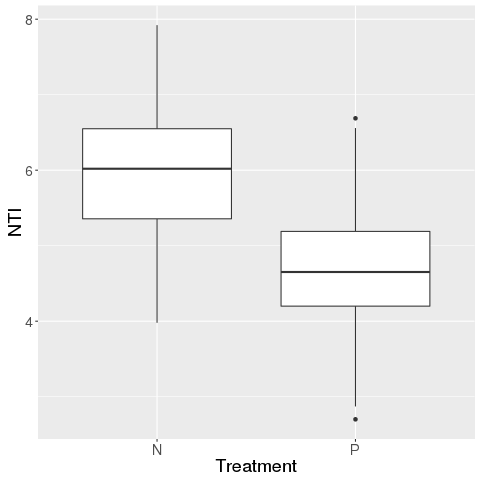

In [54]:
%%R
ggplot(data = NTI_tot, aes(x = treat, y = -mntd.obs.z)) +
geom_boxplot() + theme(text = element_text(size = 18)) + xlab('Treatment') + ylab('NTI')

In [55]:
%%R
t.test(NTI_tot$mntd.obs.z ~ NTI_tot$treat)


	Welch Two Sample t-test

data:  NTI_tot$mntd.obs.z by NTI_tot$treat
t = -14.651, df = 345.15, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.440798 -1.099745
sample estimates:
mean in group N mean in group P 
      -5.938686       -4.668415 

